# FLIGHT BOOKING PRICE PREDICTION

Problem Statement:

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that  will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# Import Datafile from the OS directory

filepath = r"C:\Users\Lenovo\Desktop\Folders\Intellipaat\Intellipaat Training - Python\PROJECTS\Dataset\Project 4 - Flight Booking\Flight_Booking.csv"

In [142]:
df = pd.read_csv(filepath)
df

Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
0               Night           Mumbai   Economy      2.17          1   5953  
1             Morning           Mumbai   Economy      2.33          1   5953  
2       Early_Morning           Mumbai   Economy      2.17          1   5956  
3           Afternoon           Mumbai   Economy      2.25          1   5955  
4             Morning           Mumbai   Economy      2.33          1   5955  
...               ...              ...       ...       ...        ...    ...  
300148        Evening        Hyderabad  Business     10.08         49  69265  
300149          Night        Hyderabad  Business     10.42         49  77105  
300150          Night        Hyderabad  Business     13.83         49  79099  
300151        Evening        Hyderabad  Business     10.00         49  81585  
300152        Evening        Hyderabad  Business     10.08         49  81585  

[300153 rows x 12 columns]

## Data Manipulation

In [143]:
# Drop unwanted column

df = df.drop(columns = ["Unnamed: 0"])
df

airline   flight source_city departure_time stops   arrival_time  \
0       SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1       SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2        AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4        Vistara   UK-963       Delhi        Morning  zero        Morning   
...          ...      ...         ...            ...   ...            ...   
300148   Vistara   UK-822     Chennai        Morning   one        Evening   
300149   Vistara   UK-826     Chennai      Afternoon   one          Night   
300150   Vistara   UK-832     Chennai  Early_Morning   one          Night   
300151   Vistara   UK-828     Chennai  Early_Morning   one        Evening   
300152   Vistara   UK-822     Chennai        Morning   one        Evening   

       destination_city     class  duration  days_left  price  
0                Mumbai   Economy      2.17          1   5953  
1                Mumbai   Economy      2.33          1   5953  
2                Mumbai   Economy      2.17          1   5956  
3                Mumbai   Economy      2.25          1   5955  
4                Mumbai   Economy      2.33          1   5955  
...                 ...       ...       ...        ...    ...  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585  

[300153 rows x 11 columns]

In [144]:
df.head(5)

airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955

In [145]:
df.tail(5)

airline  flight source_city departure_time stops arrival_time  \
300148  Vistara  UK-822     Chennai        Morning   one      Evening   
300149  Vistara  UK-826     Chennai      Afternoon   one        Night   
300150  Vistara  UK-832     Chennai  Early_Morning   one        Night   
300151  Vistara  UK-828     Chennai  Early_Morning   one      Evening   
300152  Vistara  UK-822     Chennai        Morning   one      Evening   

       destination_city     class  duration  days_left  price  
300148        Hyderabad  Business     10.08         49  69265  
300149        Hyderabad  Business     10.42         49  77105  
300150        Hyderabad  Business     13.83         49  79099  
300151        Hyderabad  Business     10.00         49  81585  
300152        Hyderabad  Business     10.08         49  81585

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [147]:
df.describe()

duration      days_left          price
count  300153.000000  300153.000000  300153.000000
mean       12.221021      26.004751   20889.660523
std         7.191997      13.561004   22697.767366
min         0.830000       1.000000    1105.000000
25%         6.830000      15.000000    4783.000000
50%        11.250000      26.000000    7425.000000
75%        16.170000      38.000000   42521.000000
max        49.830000      49.000000  123071.000000

In [148]:
df.shape

(300153, 11)

In [149]:
# Missing Values

df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Data Visualization

Text(0.5, 1.0, 'Airline Vs Price')

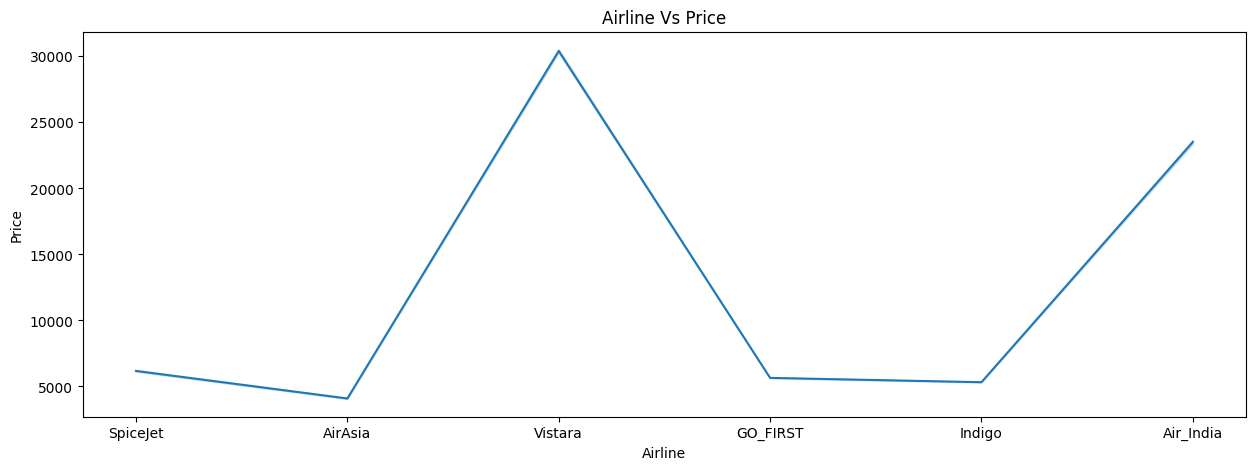

In [150]:
# Variation in price with different airlines

x = df["airline"]
y = df["price"]

plt.figure(figsize = (15,5))
sns.lineplot(x = x, y = y)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Airline Vs Price")

Text(0.5, 1.0, 'Days Left For Departure Versus Ticket Price')

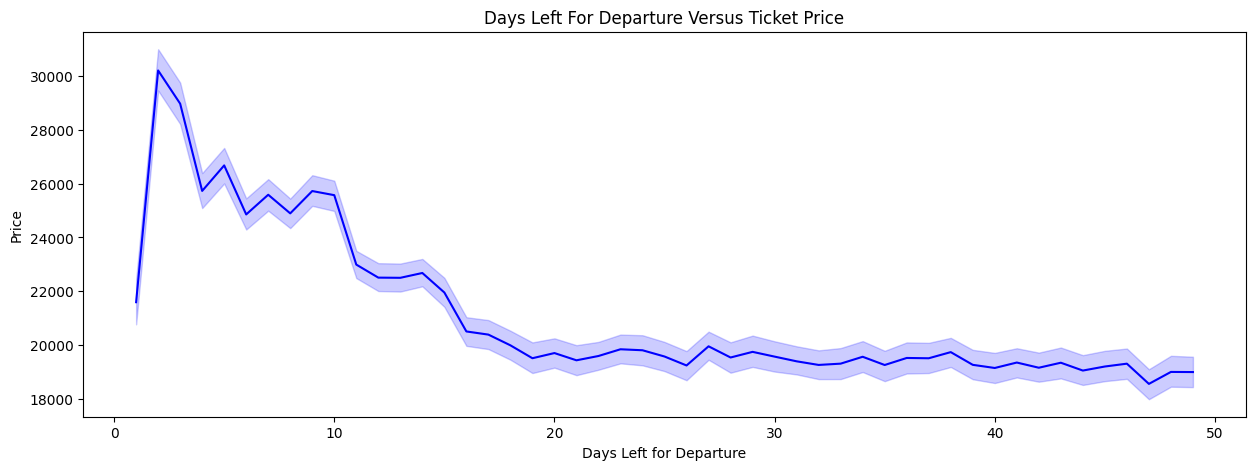

In [151]:
# Price of ticket with respect to days left

x = df["days_left"]
y = df["price"]

plt.figure(figsize = (15,5))
sns.lineplot(x = x, y = y, color = "blue")
plt.xlabel("Days Left for Departure")
plt.ylabel("Price")
plt.title("Days Left For Departure Versus Ticket Price")

<Axes: xlabel='airline', ylabel='price'>

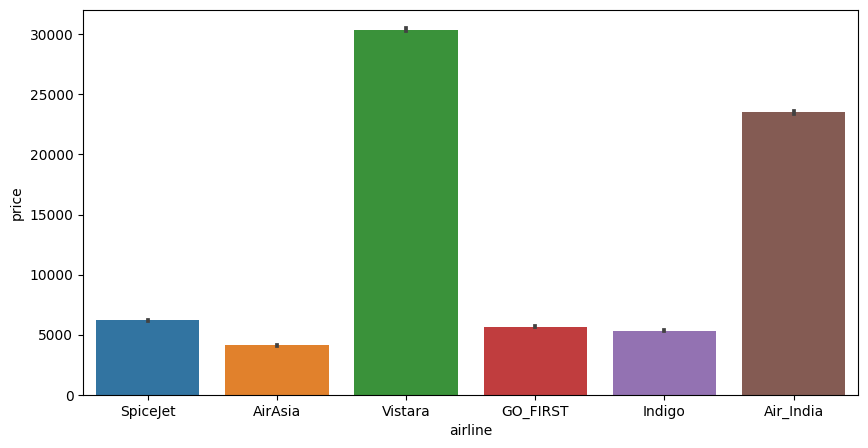

In [152]:
# Price range of all the flights

plt.figure(figsize = (10,5))
sns.barplot(x = "airline", y = "price", data = df)

<Axes: xlabel='class', ylabel='price'>

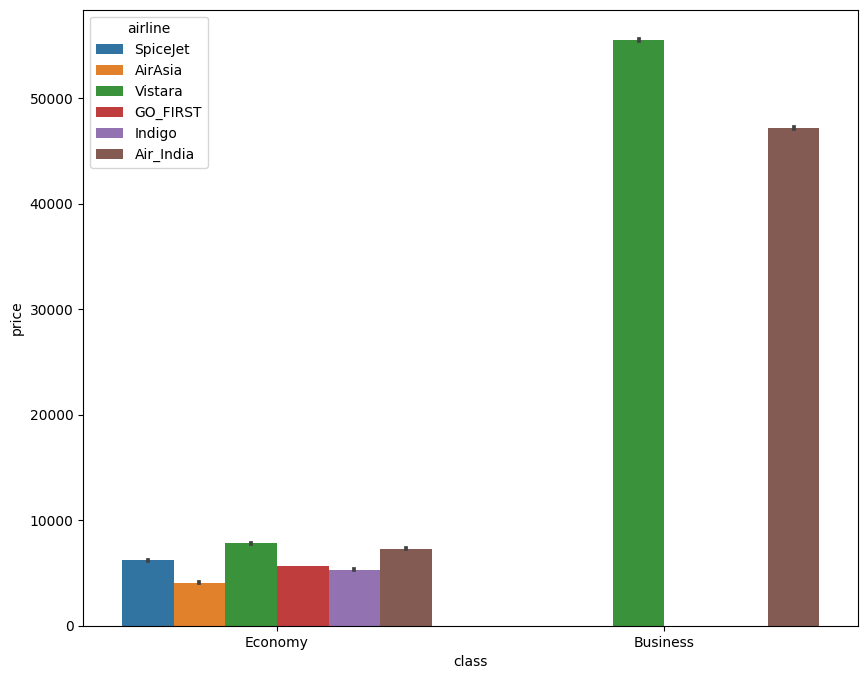

In [153]:
# Range of price of all flights of Economy and Business class

plt.figure(figsize = (10,8))
sns.barplot(x = "class", y = "price", data = df, hue = "airline")

<Axes: xlabel='days_left', ylabel='price'>

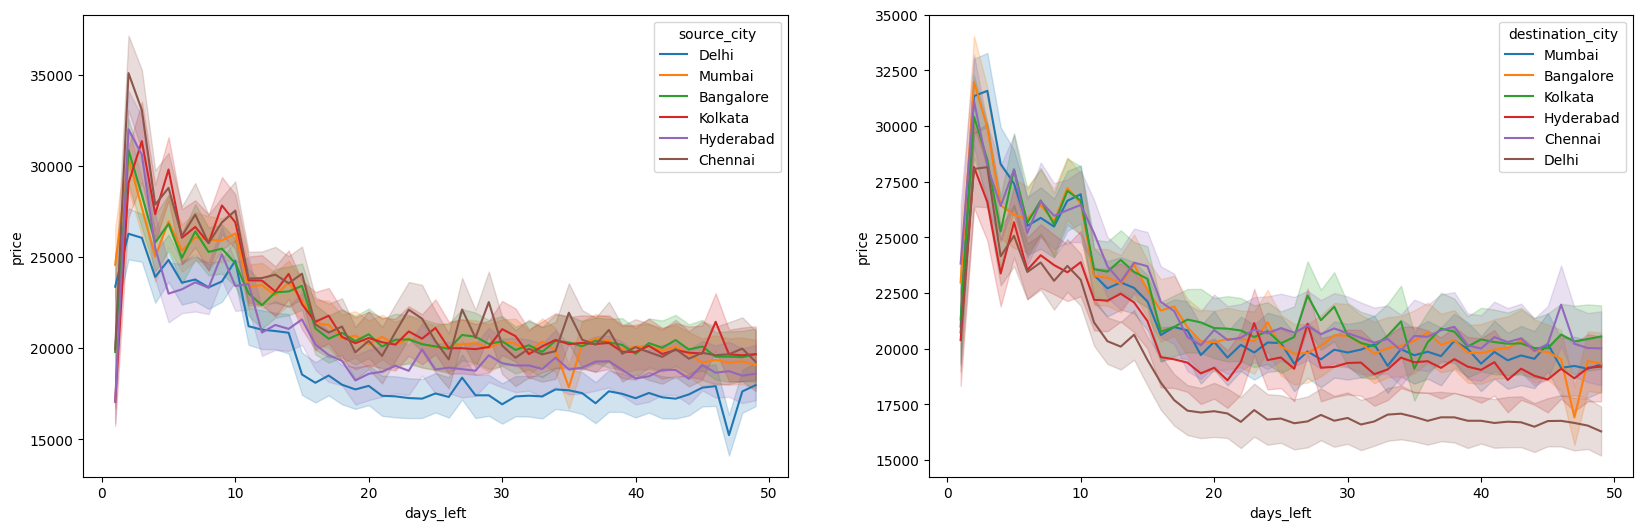

In [154]:
# Range of price of flights with source and destination city according to the days left

fig,ax = plt.subplots(1, 2, figsize = (20,6))
sns.lineplot(x = "days_left", y = "price", data = df, hue = "source_city", ax = ax[0])
sns.lineplot(x = "days_left", y = "price", data = df, hue = "destination_city", ax = ax[1])

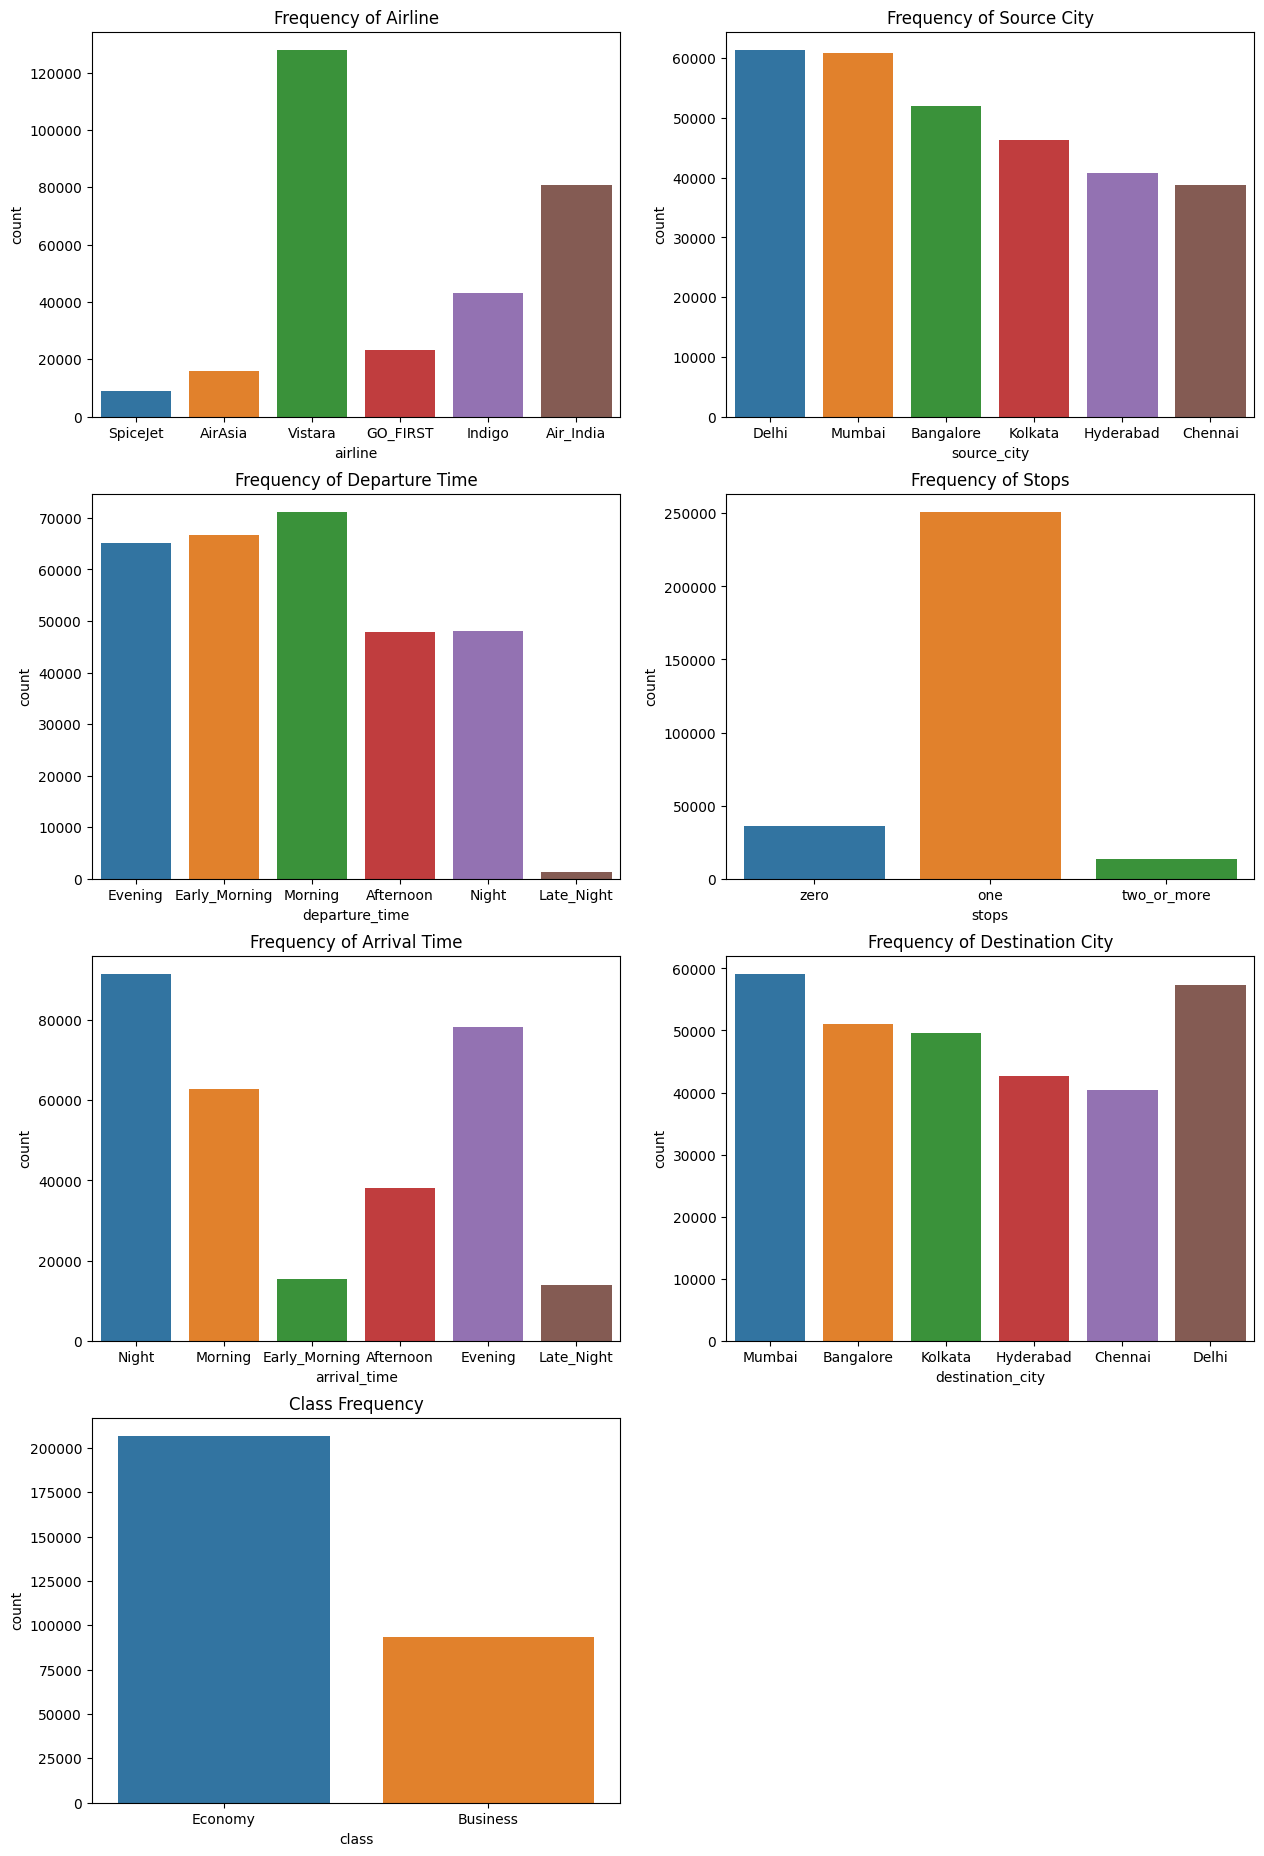

In [155]:
# Visualization of categorical features with countplot

plt.figure(figsize = (15,23))

plt.subplot(4,2,1)
sns.countplot(x = df["airline"], data = df)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x = df["source_city"], data = df)
plt.title("Frequency of Source City")

plt.subplot(4,2,3)
sns.countplot(x = df["departure_time"], data = df)
plt.title("Frequency of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x = df["stops"], data = df)
plt.title("Frequency of Stops")

plt.subplot(4,2,5)
sns.countplot(x = df["arrival_time"], data = df)
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x = df["destination_city"], data = df)
plt.title("Frequency of Destination City")

plt.subplot(4,2,7)
sns.countplot(x = df["class"], data = df)
plt.title("Class Frequency")

plt.show()

## Label Encoding

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
# Initiate the Encoding

LE = LabelEncoder()

In [158]:
# Transform the data

df["airline"] = LE.fit_transform(df["airline"])
df["source_city"] = LE.fit_transform(df["source_city"])
df["departure_time"] = LE.fit_transform(df["departure_time"])
df["stops"] = LE.fit_transform(df["stops"])
df["arrival_time"] = LE.fit_transform(df["arrival_time"])
df["destination_city"] = LE.fit_transform(df["destination_city"])
df["class"] = LE.fit_transform(df["class"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


## Feature Selection

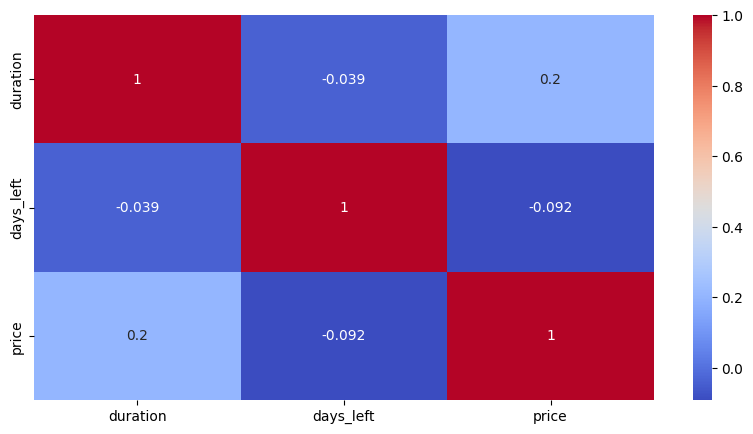

In [159]:
# Select only numeric columns

numeric_columns = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,5))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
plt.show()

In [160]:
# Selecting the features using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)

In [161]:
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [162]:
# Dropping stops column

df = df.drop(columns = ["stops"])

In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []

for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


## Linear Regression

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [165]:
# Drop column "flight" because of string datatype

X = df.drop(columns = ["price", "flight"])
Y = df['price']

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [167]:
X_train

airline  source_city  departure_time  arrival_time  destination_city  \
148417        1            4               0             4                 1   
36879         3            2               0             5                 1   
274531        1            4               0             0                 1   
166397        5            3               5             1                 0   
272722        5            4               5             5                 1   
...         ...          ...             ...           ...               ...   
119879        5            4               2             0                 2   
259178        5            0               5             5                 1   
131932        1            4               5             4                 5   
146867        2            4               0             5                 3   
121958        1            4               0             4                 2   

        class  duration  days_left  
148417      1     19.42          6  
36879       1      7.00         13  
274531      0     21.17         44  
166397      1     10.25         11  
272722      0     26.50          5  
...       ...       ...        ...  
119879      1     20.50          2  
259178      0     25.42          7  
131932      1     13.67         29  
146867      1      8.33         39  
121958      1     20.17         17  

[240122 rows x 8 columns]

In [168]:
# Initiate the model

SC = StandardScaler()

# Transform the model

X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [169]:
# Initiate the Regression

LR = LinearRegression()

In [170]:
# Train the model

LR.fit(X_train, Y_train)

LinearRegression()

In [171]:
# Predict the model

Y_pred = LR.predict(X_test)
Y_pred

array([ 4673.75531857, 51713.74471978,  6610.89765756, ...,
        4974.9626779 ,  2729.6500662 , 59638.74859827])

In [172]:
difference = pd.DataFrame(np.c_[Y_test, Y_pred], columns = ["Actual_Value", "Predicted_Value"])
difference

Actual_Value  Predicted_Value
0            7366.0      4673.755319
1           64831.0     51713.744720
2            6195.0      6610.897658
3           60160.0     55489.844234
4            6578.0      5120.342596
...             ...              ...
60026        5026.0      4960.777767
60027        3001.0      4693.865426
60028        6734.0      4974.962678
60029        5082.0      2729.650066
60030       66465.0     59638.748598

[60031 rows x 2 columns]

In [173]:
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [174]:
r2_score(Y_test, Y_pred)

0.897752737512321

In [175]:
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
MAE

4468.426673542267

In [176]:
MAPE = mean_absolute_percentage_error(Y_test, Y_pred)
MAPE

0.34765804610685463

In [177]:
MSE = metrics.mean_squared_error(Y_test, Y_pred)
MSE

52706651.3333421

In [178]:
RMSE = np.sqrt(MSE)
RMSE

7259.934664536734

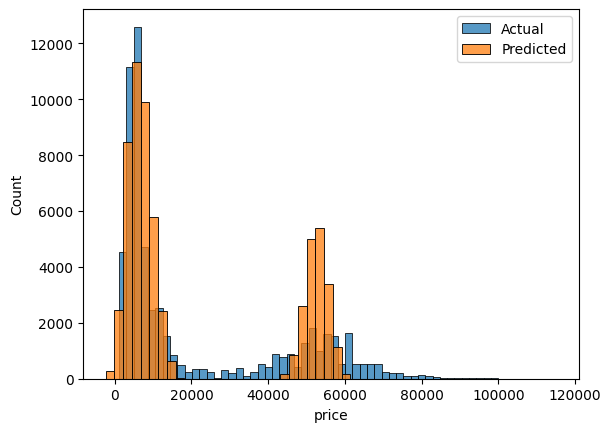

In [179]:
# Visualisation of Linear Regression

sns.histplot(Y_test, label = "Actual")
sns.histplot(Y_pred, label = "Predicted")
plt.legend()

## Decison Tree

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [181]:
# Initiate the model

DT = DecisionTreeRegressor()

In [182]:
# Train the model

DT.fit(X_train, Y_train)

DecisionTreeRegressor()

In [183]:
# Predict the model

Y_pred = DT.predict(X_test)
Y_pred

array([ 7366., 72783.,  6195., ...,  6314.,  5082., 50449.])

In [184]:
# R2 Score

r2_score(Y_pred, Y_test)

0.9746770146583646

In [185]:
# Mean absolute error

MAE = metrics.mean_absolute_error(Y_pred, Y_test)
MAE

1216.2035670459152

In [186]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_pred, Y_test))
RMSE

3616.340956658675

## Random Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

In [188]:
# Initiate the model

RFR = RandomForestRegressor()

In [189]:
# Train the model

RFR.fit(X_train, Y_train)

RandomForestRegressor()

In [190]:
# Predict the model

Y_pred = RFR.predict(X_test)

In [191]:
# R2 Score

r2_score(Y_pred, Y_test)

0.984335001985421

In [192]:
# Mean absolute error

MAE = metrics.mean_absolute_error(Y_pred, Y_test)
MAE

1125.1478733731858

In [193]:
RMSE = np.sqrt(metrics.mean_squared_error(Y_pred, Y_test))
RMSE

2827.500082967865

## Visualization the Random Forest

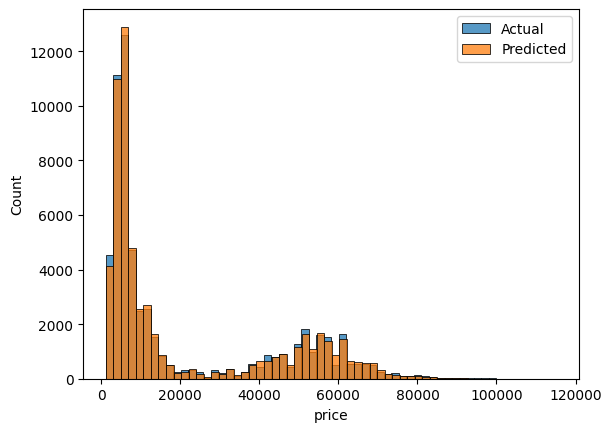

In [194]:
sns.histplot(Y_test, label = "Actual")
sns.histplot(Y_pred, label = "Predicted")
plt.legend()